# Linear Regression

## Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Load the preprocessed data

In [2]:
data_preprocessed = pd.read_csv('Preprocessed data.csv')
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear regression model

### Declare the inputs and targets

In [3]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [5]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

### Create the regression

In [7]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [8]:
y_hat = reg.predict(x_train)

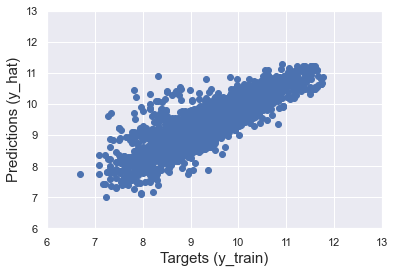

In [9]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=15)
plt.ylabel('Predictions (y_hat)',size=15)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Not a perfect match, but decent enough not to be random <br>
Let us examine the residuals as well.

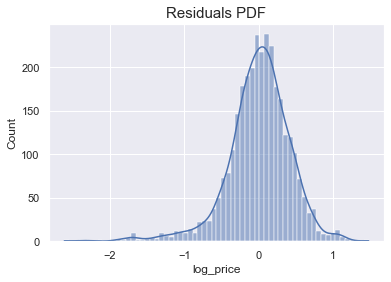

In [10]:
sns.histplot(y_train - y_hat,kde=True)
plt.title('Residuals PDF', size=15)
plt.show()

Normal distribution with mean around zero. Much longer tail on negative side, which means that we have some observations where the predicted price is much higher than the observed price.

In [11]:
r2 = reg.score(x_train,y_train)
r2

0.7546487921881218

In [12]:
n = x_train.shape[0]
p = x_train.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7532923790067227

### Finding the weights and bias

In [13]:
reg.intercept_

9.421003614148074

In [14]:
reg.coef_

array([-0.46815598,  0.21526817,  0.01105151,  0.00569157, -0.14247174,
       -0.18769337, -0.06529696, -0.09898873, -0.13980763, -0.09384461,
       -0.17892753, -0.11457574, -0.15668036, -0.11685263, -0.02572253,
       -0.15106183,  0.31442123])

In [15]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.468156
1,EngineV,0.215268
2,Brand_BMW,0.011052
3,Brand_Mercedes-Benz,0.005692
4,Brand_Mitsubishi,-0.142472
5,Brand_Renault,-0.187693
6,Brand_Toyota,-0.065297
7,Brand_Volkswagen,-0.098989
8,Body_hatch,-0.139808
9,Body_other,-0.093845


In [16]:
from sklearn.feature_selection import f_regression

f_regression(x_train,y_train)
p_values = f_regression(x_train,y_train)[1].round(3)
reg_summary['p-values'] = p_values
reg_summary

,Features,Weights,p-values
0,Mileage,-0.468156,0.000
1,EngineV,0.215268,0.000
2,Brand_BMW,0.011052,0.000
3,Brand_Mercedes-Benz,0.005692,0.000
4,Brand_Mitsubishi,-0.142472,0.000
5,Brand_Renault,-0.187693,0.000
6,Brand_Toyota,-0.065297,0.000
7,Brand_Volkswagen,-0.098989,0.000
8,Body_hatch,-0.139808,0.000
9,Body_other,-0.093845,0.029


## Testing the model

In [17]:
y_hat_test = reg.predict(x_test)

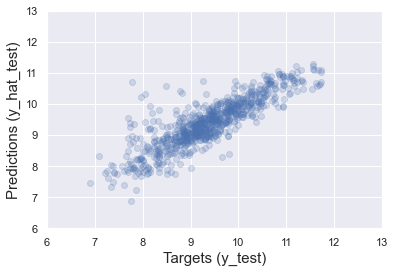

In [18]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=15)
plt.ylabel('Predictions (y_hat_test)',size=15)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Looking at the spread for the two edges, the model appear to be better at predicting higher prices than lower prices.

In [19]:
# df_pf = dataframe performance
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,40419.308971
1,7956.895960
2,5757.284408
3,9765.810605
4,7027.363814


In [20]:
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.abs(df_pf['Residual']/df_pf['Target']*100)
df_pf.head()

,Prediction,Target,Residual,Difference%
0,40419.308971,21300.0,-19119.308971,89.762014
1,7956.895960,8900.0,943.104040,10.596675
2,5757.284408,3250.0,-2507.284408,77.147213
3,9765.810605,12000.0,2234.189395,18.618245
4,7027.363814,5400.0,-1627.363814,30.136367


In [21]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16113.011638,17799.988992,1686.977355,42.085282
std,13326.229797,19723.434542,11192.614496,96.169928
min,967.030415,999.000000,-42859.020603,0.020246
25%,7467.591694,6700.000000,-2246.354353,11.024941
50%,11914.358989,11050.000000,-38.697776,24.086183
75%,20249.505640,20475.000000,3004.524837,42.381716
max,79026.348020,125000.000000,81051.158885,1785.792525


In [22]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
387,13602.75,13600.00,-2.75,0.02
74,28889.06,28900.00,10.94,0.04
314,35530.21,35500.00,-30.21,0.09
336,11313.27,11300.00,-13.27,0.12
425,2995.68,3000.00,4.32,0.14
262,52180.11,52055.25,-124.86,0.24
674,3107.51,3100.00,-7.51,0.24
648,9675.57,9700.00,24.43,0.25
79,21407.59,21335.00,-72.59,0.34
313,9865.72,9900.00,34.28,0.35


## Compare with year data included
Let us compare our model with one created with the preprocessed dataset including year as well.

### Load and scale the data

In [23]:
data_preprocessed_year = pd.read_csv('Preprocessed data (w. year).csv')
targets_year = data_preprocessed_year['log_price']
inputs_year = data_preprocessed_year.drop(['log_price'],axis=1)

scaler_year = StandardScaler()
scaler_year.fit(inputs_year)
inputs_scaled_year = scaler_year.transform(inputs_year)

x_train_year, x_test_year, y_train_year, y_test_year = train_test_split(inputs_scaled_year, targets_year, test_size=0.2, random_state=42)

### Create Linear regression model

In [24]:
reg_year = LinearRegression()
reg_year.fit(x_train_year,y_train_year)
y_hat_year = reg_year.predict(x_train_year)

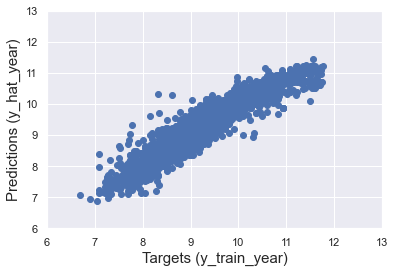

In [25]:
plt.scatter(y_train_year, y_hat_year)
plt.xlabel('Targets (y_train_year)',size=15)
plt.ylabel('Predictions (y_hat_year)',size=15)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Certainly apperas to have fewer outliers compared to previous dataset. Lets check the residuals.

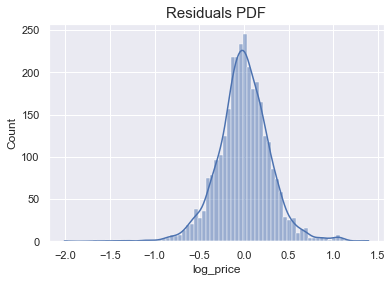

In [26]:
sns.histplot(y_train_year - y_hat_year,kde=True)
plt.title('Residuals PDF', size=15)
plt.show()

Fewer tails than previously, certainly appear to be a better fit.

In [27]:
r2_year = reg_year.score(x_train_year,y_train_year)
r2_year

0.8839064521092262

In [28]:
n_year = x_train_year.shape[0]
p_year = x_train_year.shape[1]

adjusted_r2_year = 1-(1-r2_year)*(n_year-1)/(n_year-p_year-1)
adjusted_r2_year

0.8832299600852593

Both R2 and adjusted R2 have clearly improved compared to previous model.

In [29]:
reg_summary_year = pd.DataFrame(inputs_year.columns.values, columns=['Features'])
reg_summary_year['Weights'] = reg_year.coef_

p_values_year = f_regression(x_train_year,y_train_year)[1].round(3)
reg_summary_year['p-values'] = p_values_year
reg_summary_year

,Features,Weights,p-values
0,Mileage,-0.12,0.00
1,EngineV,0.22,0.00
2,Year,0.52,0.00
3,Brand_BMW,0.02,0.00
4,Brand_Mercedes-Benz,-0.00,0.00
5,Brand_Mitsubishi,-0.13,0.00
6,Brand_Renault,-0.21,0.00
7,Brand_Toyota,-0.08,0.00
8,Brand_Volkswagen,-0.11,0.00
9,Body_hatch,-0.09,0.00


### Testing the model

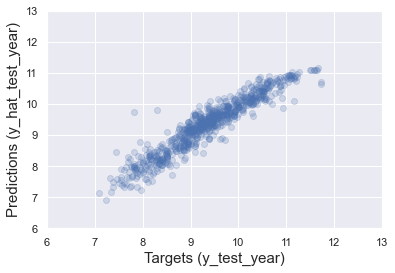

In [30]:
y_hat_test_year = reg_year.predict(x_test_year)
plt.scatter(y_test_year, y_hat_test_year, alpha=0.2)
plt.xlabel('Targets (y_test_year)',size=15)
plt.ylabel('Predictions (y_hat_test_year)',size=15)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Much lower spread on the edge cases here, even though it is still not perfect.

In [31]:
df_pf_year = pd.DataFrame(np.exp(y_hat_test_year), columns=['Prediction'])
y_test_year = y_test_year.reset_index(drop=True)
df_pf_year['Target'] = np.exp(y_test_year)
df_pf_year['Residual'] = df_pf_year['Target'] - df_pf_year['Prediction']
df_pf_year['Difference%'] = np.abs(df_pf_year['Residual']/df_pf_year['Target']*100)
df_pf_year.head()

,Prediction,Target,Residual,Difference%
0,15436.37,16000.00,563.63,3.52
1,1800.86,1599.00,-201.86,12.62
2,12693.67,17777.00,5083.33,28.59
3,15830.30,19999.00,4168.70,20.84
4,3258.08,4700.00,1441.92,30.68


In [32]:
df_pf_year.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
455,14495.94,14500.00,4.06,0.03
774,21017.86,21000.00,-17.86,0.09
272,10890.58,10900.00,9.42,0.09
647,52178.95,52055.25,-123.70,0.24
414,6878.11,6900.00,21.89,0.32
108,33748.55,33900.00,151.45,0.45
284,33154.49,33000.00,-154.49,0.47
481,3317.45,3300.00,-17.45,0.53
645,9137.83,9200.00,62.17,0.68
594,36661.06,36400.00,-261.06,0.72


It's not hard to understand why including year as a variable improves the model. Even though it has a high correlation with mileage - an older car has most likely been driven more - it is still quite important when setting the price for a second hand car.